In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
import cv2

Image shape: (427, 640, 3)


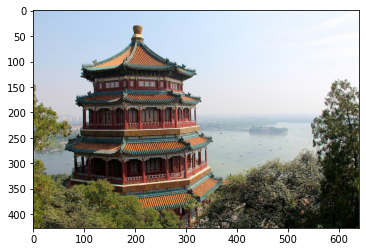

In [14]:
img = load_sample_image("china.jpg")
print('Image shape: {}'.format(img.shape))
plt.imshow(img)

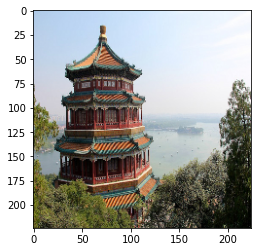

In [15]:
img = cv2.resize(img, (224, 224))
plt.imshow(img)

In [3]:
from numba import njit

In [9]:
@njit()
def get_image_patches(img, patch_size=8, img_features=3):
  idx = 0
  num_images = (img.shape[0]//patch_size)**2
  patches = np.zeros((num_images, patch_size, patch_size, img_features), dtype=np.uint8)
  for i in range(0, img.shape[0], patch_size):
    for j in range(0, img.shape[0], patch_size):
      patches[idx, :, :, :] = img[i:i+patch_size, j:j+patch_size]
      idx += 1
  return patches
      

In [10]:
patch = get_image_patches(img)
patch.shape

(784, 8, 8, 3)

In [23]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img.shape

(224, 224)

In [29]:
img = np.expand_dims(img, -1)
img.shape

(224, 224, 1)

In [30]:
%%timeit
np.squeeze(img)


643 ns ± 10.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [39]:
224*224/(16**2)

196.0